In [1]:
!pip install opencv-python

In [2]:
import pandas as pd 
import numpy as np 
import os 
from bs4 import BeautifulSoup as bs
from tensorflow.keras.applications.vgg16 import preprocess_input
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten

In [3]:
images = sorted(os.listdir('Images/'))
annotations = sorted(os.listdir('annotations/'))

In [4]:
len(images)

852

In [5]:
len(annotations)

852

In [6]:
images[20]

'maksssksksss116.png'

In [7]:
annotations[20]

'maksssksksss116.xml'

In [8]:
def generate_labels_dictionary(file_loc):
    
    with open(file_loc) as xml_file:
        soup = bs(xml_file.read(),'xml')
        objects = soup.find_all('object')
        num_persons = len(objects)
        
        
        labels = []
        boxes = []
        for obj in objects:
            if obj.find('name').text == 'without_mask':
                labels.append(0)
            elif obj.find('name').text == 'with_mask':
                labels.append(1)
            elif obj.find('name').text == 'mask_weared_incorrect':
                labels.append(2)
            else:
                break
                
                
                
            xmin = int(obj.find('xmin').text) 
            ymin = int(obj.find('ymin').text) 
            xmax = int(obj.find('xmax').text) 
            ymax = int(obj.find('ymax').text) 
            
            boxes.append([xmin,ymin,xmax,ymax])
            
        labels = np.array(labels)
        boxes = np.array(boxes)
        
        target = {}
        target['labels'] = labels
        target['boxes'] = boxes
        
        
        return target,num_persons

In [9]:
target_all = []
num_person_all = []
for file in annotations:
    target,num_person = generate_labels_dictionary('annotations/'+file)
    print(file)
    print(target)
    print(num_person)
    target_all.append(target)
    num_person_all.append(num_person)

maksssksksss0.xml
{'labels': array([0, 1, 0]), 'boxes': array([[ 79, 105, 109, 142],
       [185, 100, 226, 144],
       [325,  90, 360, 141]])}
3
maksssksksss1.xml
{'labels': array([1, 1, 1, 1, 1, 1, 1, 1, 0]), 'boxes': array([[321,  34, 354,  69],
       [224,  38, 261,  73],
       [299,  58, 315,  81],
       [143,  74, 174, 115],
       [ 74,  69,  95,  99],
       [191,  67, 221,  93],
       [ 21,  73,  44,  93],
       [369,  70, 398,  99],
       [ 83,  56, 111,  89]])}
9
maksssksksss10.xml
{'labels': array([1]), 'boxes': array([[ 98, 267, 194, 383]])}
1
maksssksksss100.xml
{'labels': array([1, 1, 1]), 'boxes': array([[189,  30, 245,  88],
       [387,  54, 400,  75],
       [118,  87, 163, 126]])}
3
maksssksksss101.xml
{'labels': array([1]), 'boxes': array([[ 48, 294, 164, 400]])}
1
maksssksksss102.xml
{'labels': array([1]), 'boxes': array([[212,  57, 251, 106]])}
1
maksssksksss103.xml
{'labels': array([1, 1, 1, 1]), 'boxes': array([[ 42,  54,  94, 110],
       [188,  46, 236

maksssksksss141.xml
{'labels': array([1, 1]), 'boxes': array([[129,  96, 175, 155],
       [220, 123, 260, 169]])}
2
maksssksksss142.xml
{'labels': array([1]), 'boxes': array([[144, 110, 244, 235]])}
1
maksssksksss143.xml
{'labels': array([1]), 'boxes': array([[102, 200, 194, 333]])}
1
maksssksksss144.xml
{'labels': array([1, 1, 1]), 'boxes': array([[130,  19, 155,  47],
       [212,  56, 232,  79],
       [298,  60, 316,  80]])}
3
maksssksksss145.xml
{'labels': array([2, 2, 0]), 'boxes': array([[ 91,  89, 114, 111],
       [183, 102, 203, 122],
       [310,  96, 333, 119]])}
3
maksssksksss146.xml
{'labels': array([1, 1]), 'boxes': array([[119, 122, 184, 192],
       [265,  90, 324, 153]])}
2
maksssksksss147.xml
{'labels': array([0, 1, 1, 1]), 'boxes': array([[103,   9, 120,  33],
       [198,  15, 218,  36],
       [224,  89, 243, 109],
       [272,  33, 294,  55]])}
4
maksssksksss148.xml
{'labels': array([1, 0, 0, 1, 0, 1]), 'boxes': array([[  1,  20,  81, 136],
       [ 68,  95, 124

maksssksksss200.xml
{'labels': array([1, 1, 1]), 'boxes': array([[  5, 185, 110, 287],
       [115, 130, 180, 192],
       [215,  94, 301, 195]])}
3
maksssksksss201.xml
{'labels': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 'boxes': array([[ 33,  82,  76, 127],
       [ 59,  64,  88,  98],
       [ 36,  40,  55,  61],
       [101,  70, 162, 132],
       [ 69,  29,  89,  49],
       [223,  91, 265, 127],
       [240,  28, 268,  52],
       [286,  56, 318,  90],
       [370,  36, 398,  65],
       [  1,  45,  16,  70]])}
10
maksssksksss202.xml
{'labels': array([1, 1, 1, 1, 1, 1]), 'boxes': array([[ 15, 158,  35, 187],
       [ 46, 126,  70, 153],
       [ 92,  99, 120, 132],
       [180, 127, 213, 165],
       [300, 135, 332, 169],
       [348, 154, 371, 181]])}
6
maksssksksss203.xml
{'labels': array([1, 1, 1, 1]), 'boxes': array([[ 11,  28,  37,  57],
       [100,  42, 124,  67],
       [236,  48, 255,  70],
       [304,  42, 329,  64]])}
4
maksssksksss204.xml
{'labels': array([1, 1, 1, 1, 1

maksssksksss25.xml
{'labels': array([1]), 'boxes': array([[122,  68, 195, 152]])}
1
maksssksksss250.xml
{'labels': array([1, 0, 0, 2, 2]), 'boxes': array([[180,  64, 222, 107],
       [ 85,  65, 118, 103],
       [135,  36, 154,  64],
       [ 26,  42,  59,  85],
       [341,  32, 385,  85]])}
5
maksssksksss251.xml
{'labels': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1]), 'boxes': array([[ 28, 103,  60, 140],
       [ 15,  41,  41,  71],
       [ 44,  10,  67,  41],
       [ 78,  89, 104, 124],
       [ 56,  71,  78,  99],
       [122, 103, 146, 144],
       [ 91, 181, 129, 206],
       [150, 166, 194, 206],
       [155,  57, 183,  93],
       [125,  36, 150,  66],
       [207,  64, 231,  94],
       [216, 146, 249, 179],
       [240, 103, 265, 140],
       [230,  51, 256,  85],
       [255,  13, 277,  41],
       [206,  10, 225,  30],
       [296,  72, 319, 102],
       [306, 120, 342, 162],
       [333, 119, 356, 151],
       [373,  76, 401, 1

maksssksksss297.xml
{'labels': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]), 'boxes': array([[102,  17, 112,  31],
       [ 87,  26, 103,  41],
       [ 50, 125,  82, 156],
       [123, 102, 148, 130],
       [157,  57, 179,  82],
       [157,   4, 165,  12],
       [180,   7, 187,  17],
       [217,  13, 229,  24],
       [207,  44, 228,  68],
       [216,  81, 241, 108],
       [250,  43, 273,  67],
       [294,  22, 306,  35],
       [318,  27, 332,  44],
       [310,   5, 321,  17],
       [334,   3, 348,  16],
       [354,  10, 367,  20]])}
16
maksssksksss298.xml
{'labels': array([1, 1]), 'boxes': array([[124, 114, 209, 212],
       [248,  52, 324, 140]])}
2
maksssksksss299.xml
{'labels': array([0]), 'boxes': array([[ 62, 194, 160, 320]])}
1
maksssksksss3.xml
{'labels': array([1, 1, 1, 1, 1, 1, 1, 1, 1]), 'boxes': array([[ 52,  53,  73,  76],
       [ 72,  53,  92,  75],
       [112,  51, 120,  68],
       [155,  60, 177,  83],
       [189,  59, 210,  80],
       [235, 

maksssksksss356.xml
{'labels': array([1]), 'boxes': array([[113, 178, 218, 302]])}
1
maksssksksss357.xml
{'labels': array([1]), 'boxes': array([[219,  35, 263,  85]])}
1
maksssksksss358.xml
{'labels': array([1, 1, 1, 1]), 'boxes': array([[ 91,  64, 126, 106],
       [179,  65, 221, 109],
       [268,  82, 300, 115],
       [300,  86, 341, 125]])}
4
maksssksksss359.xml
{'labels': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]), 'boxes': array([[ 23,  40,  44,  61],
       [ 59,  54,  76,  73],
       [114,  35, 126,  49],
       [130,  47, 152,  71],
       [140,  35, 154,  49],
       [155,  44, 171,  63],
       [169,  96, 191, 117],
       [185,  45, 197,  59],
       [206,  42, 218,  59],
       [217,  43, 234,  63],
       [238,  52, 253,  68],
       [252,  59, 271,  79],
       [274,  62, 296,  84],
       [298,  39, 314,  57],
       [316,  42, 331,  55],
       [345,  33, 362,  53],
       [368,  38, 385,  59],
       [332,  42, 341,  54]])}
18
maksssksksss36.xml


maksssksksss437.xml
{'labels': array([1, 1, 1, 1, 1]), 'boxes': array([[ 82,  43, 113,  89],
       [131, 111, 147, 131],
       [145, 114, 155, 131],
       [205, 109, 232, 139],
       [276, 102, 302, 131]])}
5
maksssksksss438.xml
{'labels': array([1, 1, 1, 1]), 'boxes': array([[ 78,  22,  92,  36],
       [152,  13, 166,  28],
       [233,  32, 246,  46],
       [293,  28, 304,  46]])}
4
maksssksksss439.xml
{'labels': array([1, 1, 1, 1]), 'boxes': array([[192, 120, 224, 155],
       [287, 110, 319, 157],
       [134, 126, 151, 146],
       [171, 132, 187, 148]])}
4
maksssksksss44.xml
{'labels': array([1, 1, 1, 0]), 'boxes': array([[ 43, 139,  80, 182],
       [140,  93, 188, 148],
       [261,  47, 321, 120],
       [332,  12, 394,  90]])}
4
maksssksksss440.xml
{'labels': array([1, 2, 1, 1, 1, 1, 1, 2]), 'boxes': array([[ 81,  25, 102,  47],
       [101,  30, 114,  50],
       [122,  48, 134,  62],
       [158,  46, 172,  61],
       [184,  49, 216,  77],
       [240,  40, 253,  60]

maksssksksss492.xml
{'labels': array([1]), 'boxes': array([[ 60, 154, 161, 278]])}
1
maksssksksss493.xml
{'labels': array([1]), 'boxes': array([[ 62, 165, 182, 315]])}
1
maksssksksss494.xml
{'labels': array([1]), 'boxes': array([[ 91,  80, 163, 158]])}
1
maksssksksss495.xml
{'labels': array([0, 2, 1, 0, 1, 0, 1, 1, 0]), 'boxes': array([[  1,  47,  26,  97],
       [ 77,  24, 134,  98],
       [ 99, 174, 168, 224],
       [170,  64, 224, 125],
       [224,  70, 267, 121],
       [274,  61, 330, 122],
       [291, 189, 356, 224],
       [329, 117, 388, 181],
       [351,  53, 389,  92]])}
9
maksssksksss496.xml
{'labels': array([2]), 'boxes': array([[ 85,  97, 184, 207]])}
1
maksssksksss497.xml
{'labels': array([1]), 'boxes': array([[111, 226, 194, 331]])}
1
maksssksksss498.xml
{'labels': array([1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0]), 'boxes': array([[ 92,  46, 112,  67],
       [151,  59, 163,  72],
       [166,  53, 179,  67],
       [175,  76, 188,  86],
       [194,  57, 207,  74],
       

maksssksksss535.xml
{'labels': array([1, 1, 0, 0, 1, 1]), 'boxes': array([[ 43,  38,  59,  55],
       [ 93,  32, 118,  63],
       [233,  48, 242,  56],
       [273,  51, 283,  61],
       [318,  35, 330,  51],
       [353,  40, 368,  58]])}
6
maksssksksss536.xml
{'labels': array([1]), 'boxes': array([[107, 158, 197, 287]])}
1
maksssksksss537.xml
{'labels': array([0]), 'boxes': array([[ 95, 177, 195, 295]])}
1
maksssksksss538.xml
{'labels': array([0, 1, 1]), 'boxes': array([[ 27,  81,  33,  86],
       [122,  80, 142, 104],
       [249,  57, 275,  86]])}
3
maksssksksss539.xml
{'labels': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]), 'boxes': array([[ 25,  13,  35,  25],
       [ 55,  10,  65,  20],
       [120,  16, 130,  31],
       [167,   3, 178,  15],
       [ 21,  48,  34,  62],
       [ 53,  40,  66,  52],
       [107,  37, 119,  51],
       [116,  56, 128,  68],
       [ 91,  77, 104,  8

maksssksksss59.xml
{'labels': array([1, 1, 1, 1, 1]), 'boxes': array([[ 94, 133, 109, 148],
       [140, 105, 158, 120],
       [174,  98, 190, 114],
       [230,  99, 244, 115],
       [294, 108, 307, 123]])}
5
maksssksksss590.xml
{'labels': array([1]), 'boxes': array([[ 66, 189, 172, 316]])}
1
maksssksksss591.xml
{'labels': array([1]), 'boxes': array([[137, 101, 195, 172]])}
1
maksssksksss592.xml
{'labels': array([1]), 'boxes': array([[121, 227, 384, 495]])}
1
maksssksksss593.xml
{'labels': array([1, 1, 1]), 'boxes': array([[ 75, 107, 126, 185],
       [122,  78, 183, 141],
       [196,  98, 235, 148]])}
3
maksssksksss594.xml
{'labels': array([1, 1, 1, 1, 1, 1, 1, 1]), 'boxes': array([[ 11,  64,  40,  94],
       [ 88,  61, 119,  95],
       [184,  49, 210,  83],
       [217,  64, 246,  97],
       [243,  52, 271,  78],
       [276,  42, 311,  70],
       [322,  35, 346,  66],
       [353,  26, 384,  61]])}
8
maksssksksss595.xml
{'labels': array([1, 1, 1, 1, 1, 1]), 'boxes': array([[

maksssksksss632.xml
{'labels': array([1]), 'boxes': array([[ 94,  57, 167, 131]])}
1
maksssksksss633.xml
{'labels': array([1]), 'boxes': array([[269, 138, 324, 190]])}
1
maksssksksss634.xml
{'labels': array([2, 1, 1, 0]), 'boxes': array([[126,  62, 147,  91],
       [184,  91, 201, 115],
       [307,  86, 323, 105],
       [370,  95, 381, 108]])}
4
maksssksksss635.xml
{'labels': array([1]), 'boxes': array([[ 79, 112, 232, 318]])}
1
maksssksksss636.xml
{'labels': array([1, 1, 0, 0, 1]), 'boxes': array([[ 76,  94,  99, 121],
       [163, 113, 187, 133],
       [229,  93, 243, 108],
       [271, 103, 285, 121],
       [ 37, 100,  46, 112]])}
5
maksssksksss637.xml
{'labels': array([1, 1, 1, 1, 1, 1]), 'boxes': array([[ 37,  36,  55,  54],
       [162,  24, 192,  54],
       [176, 109, 202, 127],
       [261,  36, 287,  63],
       [312,  33, 329,  45],
       [357,  27, 371,  42]])}
6
maksssksksss638.xml
{'labels': array([1, 1]), 'boxes': array([[ 53, 100, 108, 158],
       [279,  95, 360,

maksssksksss695.xml
{'labels': array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1]), 'boxes': array([[297, 174, 337, 215],
       [319, 125, 350, 156],
       [164, 134, 195, 165],
       [189, 167, 230, 206],
       [372, 135, 396, 158],
       [ 59, 148,  92, 189],
       [ 20, 124,  42, 148],
       [ 98, 143, 116, 170],
       [131, 132, 152, 153],
       [146, 117, 169, 146],
       [196, 118, 220, 143],
       [220, 121, 236, 140],
       [240,  98, 252, 113],
       [283,  89, 300, 103],
       [112, 122, 128, 142],
       [ 42, 103,  56, 118],
       [141,  95, 159, 113],
       [183,  84, 196,  98],
       [204,  80, 210,  90],
       [254,  79, 261,  88],
       [166,  85, 175,  95],
       [ 98,  76, 106,  84],
       [268,  93, 282, 106],
       [226, 107, 238, 122],
       [362,  79, 371,  90],
       [380,  76, 389,  88],
       [310,  89, 317,  98],
       [372,  76, 380,  86]])}
28
maksssksksss696.xml
{'labels': array([1, 1,

maksssksksss740.xml
{'labels': array([1, 1]), 'boxes': array([[143,  60, 168,  89],
       [275,  52, 299,  80]])}
2
maksssksksss741.xml
{'labels': array([2]), 'boxes': array([[111,  40, 151,  77]])}
1
maksssksksss742.xml
{'labels': array([1]), 'boxes': array([[152, 151, 256, 300]])}
1
maksssksksss743.xml
{'labels': array([1]), 'boxes': array([[111, 166, 199, 280]])}
1
maksssksksss744.xml
{'labels': array([1, 1]), 'boxes': array([[ 83,  81, 112, 113],
       [133,  73, 139,  81]])}
2
maksssksksss745.xml
{'labels': array([1]), 'boxes': array([[146, 228, 223, 328]])}
1
maksssksksss746.xml
{'labels': array([1]), 'boxes': array([[ 29, 198, 135, 324]])}
1
maksssksksss747.xml
{'labels': array([1]), 'boxes': array([[ 94, 198, 189, 327]])}
1
maksssksksss748.xml
{'labels': array([2]), 'boxes': array([[179,  47, 283, 169]])}
1
maksssksksss749.xml
{'labels': array([1, 1]), 'boxes': array([[ 93, 102, 118, 126],
       [178, 190, 200, 211]])}
2
maksssksksss75.xml
{'labels': array([1, 1, 1, 1, 1, 1,

maksssksksss799.xml
{'labels': array([1, 1, 1, 1, 1, 1, 1]), 'boxes': array([[ 29,  66,  47,  82],
       [ 45,  41,  65,  63],
       [ 11, 217,  65, 263],
       [ 84, 239, 134, 285],
       [304, 210, 325, 230],
       [317, 249, 333, 266],
       [340, 251, 369, 275]])}
7
maksssksksss8.xml
{'labels': array([1]), 'boxes': array([[ 75, 271, 152, 385]])}
1
maksssksksss80.xml
{'labels': array([1]), 'boxes': array([[214,  54, 291, 132]])}
1
maksssksksss800.xml
{'labels': array([1, 1, 1, 1]), 'boxes': array([[ 62,  71,  76,  85],
       [184,  76, 198,  92],
       [248,  61, 265,  79],
       [317,  65, 334,  81]])}
4
maksssksksss801.xml
{'labels': array([1, 1, 1, 1, 1, 1, 0, 0]), 'boxes': array([[ 73,  92,  92, 118],
       [158, 112, 181, 130],
       [192,  99, 202, 111],
       [ 34,  96,  41, 108],
       [291,  92, 300, 105],
       [311,  97, 320, 108],
       [221,  90, 236, 108],
       [263, 100, 279, 120]])}
8
maksssksksss802.xml
{'labels': array([1, 1, 1, 1]), 'boxes': array

maksssksksss92.xml
{'labels': array([1, 1, 1, 1, 1, 0, 1, 1]), 'boxes': array([[ 12, 141,  39, 174],
       [116, 115, 148, 151],
       [179,  79, 249, 149],
       [323,  95, 359, 143],
       [ 87, 123, 108, 147],
       [ 16, 115,  38, 139],
       [249, 122, 264, 141],
       [356, 117, 370, 143]])}
8
maksssksksss93.xml
{'labels': array([1, 1, 1, 1, 1, 1, 1, 1, 1]), 'boxes': array([[ 82,  72, 104,  92],
       [150,  78, 165,  94],
       [171,  78, 195, 103],
       [181, 101, 207, 129],
       [219,  82, 234,  97],
       [248,  76, 267,  95],
       [271,  77, 297, 103],
       [292,  62, 309,  82],
       [388,  72, 401,  92]])}
9
maksssksksss94.xml
{'labels': array([1, 1, 1, 1, 2, 0]), 'boxes': array([[374,  66, 400,  98],
       [305,  58, 337,  93],
       [ 43,  77,  83, 127],
       [110,  95, 171, 169],
       [227,  91, 255, 122],
       [267,  74, 290,  96]])}
6
maksssksksss95.xml
{'labels': array([0]), 'boxes': array([[ 67, 289, 155, 400]])}
1
maksssksksss96.xml
{'lab

## Preprocessing of Data

In [10]:
image_size = 224
face_images = []
face_label = []
for i,image_path in enumerate(images):
    image_loaded = cv2.imread('images/' + image_path)
    for j in range(0,num_person_all[i]):
        face_loc = target_all[i]['boxes'][j]
        temp_face = image_loaded[face_loc[1]:face_loc[3],face_loc[0]:face_loc[2]]
        temp_face = cv2.resize(temp_face,(image_size,image_size))
        temp_face = preprocess_input(temp_face)
        face_images.append(temp_face)
        face_label.append(target_all[i]['labels'][j])
face_images = np.array(face_images)
face_label = np.array(face_label)
        

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


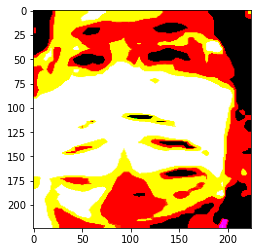

In [11]:
plt.imshow(face_images[20])

In [12]:
face_label[20]

1

In [13]:
x_train,x_test,y_train,y_test = train_test_split(face_images,face_label,test_size=0.2,random_state=42,shuffle=True)

In [14]:
image_generator = ImageDataGenerator()

In [15]:
model=Sequential([
    Conv2D(64,(3,3),activation="relu",padding="same",input_shape=(224,224,3)),
    Conv2D(64,(3,3),activation="relu",padding="same"),
    MaxPooling2D((2,2)),
    
     Conv2D(128,(3,3),activation="relu",padding="same"),
    Conv2D(128,(3,3),activation="relu",padding="same"),
    MaxPooling2D((2,2)),
    
     Conv2D(256,(3,3),activation="relu",padding="same"),
    Conv2D(256,(3,3),activation="relu",padding="same"),
    Conv2D(256,(3,3),activation="relu",padding="same"),
    MaxPooling2D((2,2)),
    
    Conv2D(512,(3,3),activation="relu",padding="same"),
    Conv2D(512,(3,3),activation="relu",padding="same"),
    Conv2D(512,(3,3),activation="relu",padding="same"),
    MaxPooling2D((2,2)),
    
    Conv2D(512,(3,3),activation="relu",padding="same"),
    Conv2D(512,(3,3),activation="relu",padding="same"),
    Conv2D(512,(3,3),activation="relu",padding="same"),
    MaxPooling2D((2,2)),
    
    Flatten(),
    
    Dense(4096,activation ="relu"),
    Dense(2048,activation ="relu"),
    Dense(3,activation="softmax")
    
    
    
    
])

In [16]:
model.compile(optimizer="adam",loss="SparseCategoricalCrossentropy",metrics=["accuracy"])

In [ ]:
history = model.fit(image_generator.flow(x_train,y_train),batch_size=500,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
102/102 [==============================] - ETA: 0s - loss: 73.9992 - accuracy: 0.8381  

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Accuracy Plot')
plt.legend(['train','test'])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.legend(['train','test'])

In [ ]:
model.save('capstone_CNN.h5')